# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
architecture = 'cnn'
branches = 4

## Ensemble

In [4]:
df = pd.read_csv('results/mnist-{}/B{}-test.csv'.format(architecture, branches), header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,acc_3,acc_4,acc_7,acc_8,after_mean_acc,before_mean_acc,loss_3,loss_4,loss_7,loss_8
1,0.0,0.9743,0.9777,0.9672,0.9764,0.984,0.9843,0.083448425,0.075588435,0.103902146,0.08071076
2,NaN,acc_1,acc_5,acc_6,acc_7,after_mean_acc,before_mean_acc,loss_1,loss_5,loss_6,loss_7
3,0.0,0.9565,0.9748,0.9731,0.9672,0.9816,0.9819,0.14550464,0.082412966,0.09375493,0.103902146
4,NaN,acc_2,acc_6,acc_7,acc_8,after_mean_acc,before_mean_acc,loss_2,loss_6,loss_7,loss_8
5,0.0,0.9738,0.9731,0.9672,0.9764,0.983,0.983,0.08585679,0.09375493,0.103902146,0.08071076
6,NaN,acc_2,acc_3,acc_6,acc_7,after_mean_acc,before_mean_acc,loss_2,loss_3,loss_6,loss_7
7,0.0,0.9738,0.9743,0.9731,0.9672,0.982,0.9823,0.08585679,0.083448425,0.09375493,0.103902146
8,NaN,acc_3,acc_5,acc_7,acc_8,after_mean_acc,before_mean_acc,loss_3,loss_5,loss_7,loss_8
9,0.0,0.9743,0.9748,0.9672,0.9764,0.9839,0.9837,0.083448425,0.082412966,0.103902146,0.08071076


In [6]:
avg_acc = df.iloc[range(1, len(df.index)+1, 2), branches+2].astype('float32').mean()
print(avg_acc)

0.98275


## Baseline

In [16]:
baseline_val_acc = []
for i in range(8):
    df = pd.read_csv('results/mnist-{}/train_{}.csv'.format(architecture, i+1))
    baseline_val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(baseline_val_acc)
print(baseline)

0.9717250019311905


In [17]:
print(baseline_val_acc)

[0.9564999938011168, 0.973800003528595, 0.9743000268936156, 0.9776999950408936, 0.9747999906539916, 0.9731000065803528, 0.967199981212616, 0.9764000177383424]


## Virtual Branching

In [11]:
results = {}
results_std = {}
for frac in [0, 0.25, 0.5, 0.75, 1]:
    val_acc = []
    for i in range(4):
        df = pd.read_csv('results/vb-mnist-{}/B{}/S{:.2f}/train_{}.csv'.format(architecture, branches, frac, i+1))
        val_acc.append(df.iloc[-1]['val_acc'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9840999841690063, 0.9843999743461608, 0.9850999712944032, 0.9850000143051147]
0.25 [0.9844999909400941, 0.9843000173568726, 0.9836000204086304, 0.9833999872207642]
0.5 [0.9812999963760376, 0.9825999736785888, 0.9830999970436096, 0.9830999970436096]
0.75 [0.9832999706268309, 0.9837999939918518, 0.9814000129699708, 0.9821000099182128]
1 [0.9745000004768372, 0.979300022125244, 0.9789999723434448, 0.9812999963760376]


In [12]:
results

{0: 0.9846499860286713,
 0.25: 0.9839500039815903,
 0.5: 0.9825249910354614,
 0.75: 0.9826499968767166,
 1: 0.9785249978303909}

## Create Figure

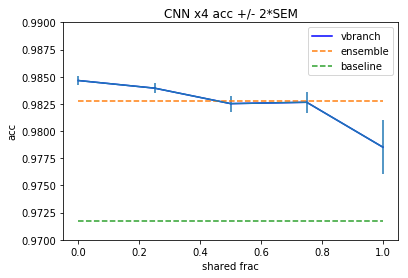

In [14]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], label='vbranch', color='blue')
trials = 4
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), label='baseline', linestyle='--')

if architecture == 'fcn':
    plt.ylim(0.94, 0.96)
else:
    plt.ylim(0.97, 0.99)

plt.legend()
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} x{} acc +/- 2*SEM'.format(architecture.upper(), branches))

plt.savefig('figs/{}-{}-results.png'.format(architecture, branches))
plt.show()